<a href="https://colab.research.google.com/github/Wish245/PyTorch_Tutorial/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1=8, h2=9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
x = my_df.drop('variety', axis=1)
y = my_df['variety']

In [10]:
x = x.values
y = y.values

In [20]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 32)

In [13]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [15]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1225894689559937
Epoch: 10 Loss: 1.0135607719421387
Epoch: 20 Loss: 0.8206457495689392
Epoch: 30 Loss: 0.598098635673523
Epoch: 40 Loss: 0.4137578308582306
Epoch: 50 Loss: 0.2832970917224884
Epoch: 60 Loss: 0.19361941516399384
Epoch: 70 Loss: 0.1366386115550995
Epoch: 80 Loss: 0.10245425999164581
Epoch: 90 Loss: 0.08336663991212845


Text(0.5, 0, 'Epoch')

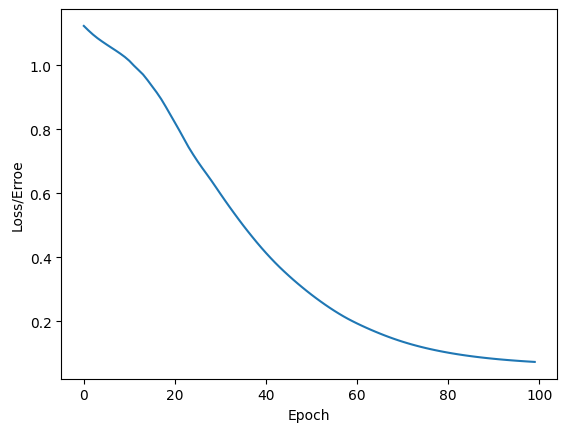

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Erroe')
plt.xlabel('Epoch')

In [17]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

In [18]:
loss

tensor(0.0570)

In [19]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)
    if y_test[i] == 0.0:
      x = 'Setosa'
    elif y_test[i] == 1.0:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    print(f'{i+1:2}.) {str(y_val)} {x}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}%')

 1.) tensor([-4.1463,  5.0282,  2.5055]) Versicolor
 2.) tensor([ 5.1142, -2.7576, -3.1783]) Setosa
 3.) tensor([ 4.0352, -1.7570, -2.6939]) Setosa
 4.) tensor([-4.6162,  5.5497,  2.6854]) Versicolor
 5.) tensor([-6.1847,  4.2124,  6.8947]) Virginica
 6.) tensor([-7.4786,  5.6410,  7.4071]) Virginica
 7.) tensor([ 3.5939, -1.3372, -2.5116]) Setosa
 8.) tensor([ 4.2962, -2.0118, -2.7961]) Setosa
 9.) tensor([-4.2421,  5.4835,  2.1355]) Versicolor
10.) tensor([ 4.5124, -2.1952, -2.9039]) Setosa
11.) tensor([-4.7493,  5.8288,  2.5745]) Versicolor
12.) tensor([-7.2520,  4.4656,  8.3614]) Virginica
13.) tensor([-2.8918,  4.6705,  0.7947]) Versicolor
14.) tensor([-2.9833,  4.7886,  0.8439]) Versicolor
15.) tensor([-6.5849,  4.7801,  6.8767]) Virginica
16.) tensor([-6.8378,  3.8055,  8.4303]) Virginica
17.) tensor([-4.4287,  4.8880,  3.1420]) Versicolor
18.) tensor([-5.9769,  4.8211,  5.8025]) Virginica
19.) tensor([-3.2091,  4.9927,  0.9574]) Versicolor
20.) tensor([ 5.0460, -2.6825, -3.1411

In [21]:
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [22]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 3.4146, -1.1471, -2.4540])


In [23]:
torch.save(model.state_dict(), 'my_stupid_iris_model.pt')

In [24]:
new_model = Model()
new_model.load_state_dict(torch.load('my_stupid_iris_model.pt'))

<ipython-input-24-1e378d9215fd>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_stupid_iris_model.pt'))


<All keys matched successfully>

In [25]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)